In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
file_path="C:\\Users\\aleez\\OneDrive\\Documents\\loan prediction\\Dataset of Loan Prediction.csv"
df=pd.read_csv(file_path)
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [8]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

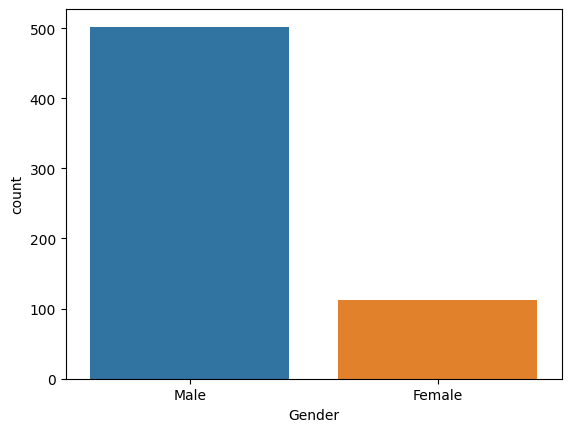

In [10]:
sns.countplot(data=df,x='Gender')
plt.show()

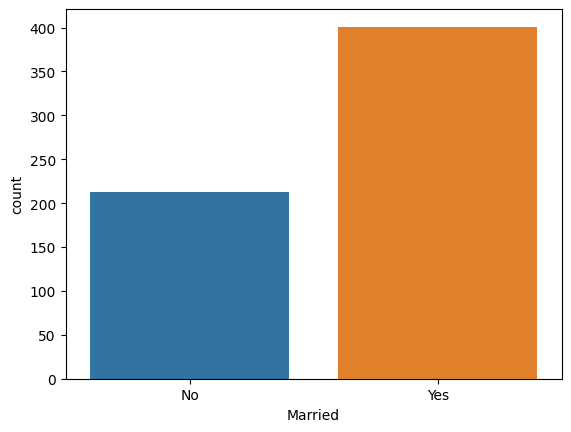

In [11]:
sns.countplot(data=df,x='Married')
plt.show()

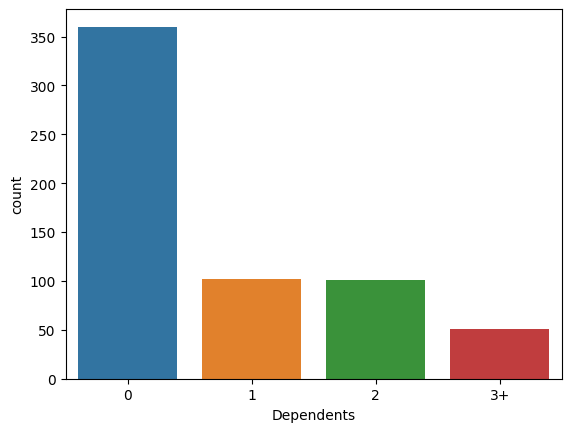

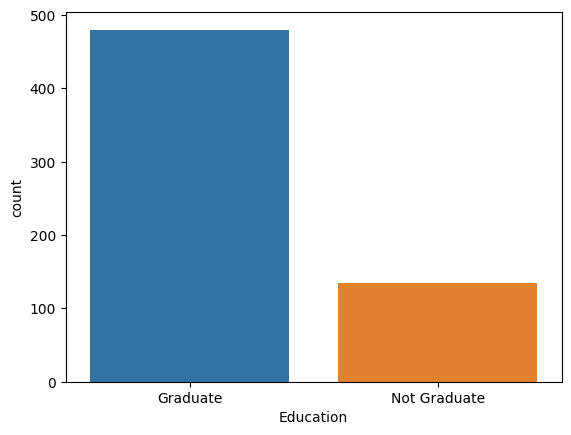

In [12]:
sns.countplot(data=df,x='Dependents')
plt.show()
sns.countplot(data=df,x='Education')
plt.show()

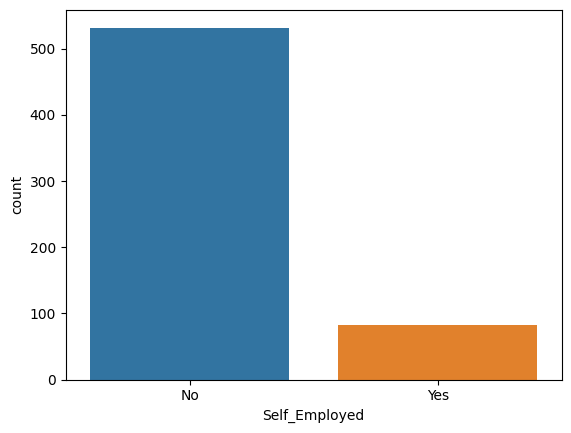

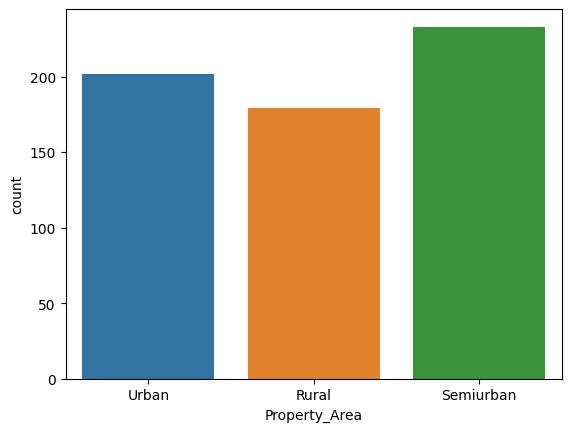

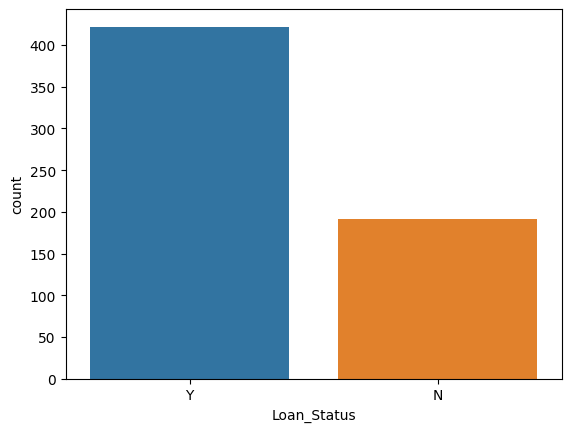

In [13]:
sns.countplot(data=df,x='Self_Employed')
plt.show()
sns.countplot(data=df,x='Property_Area')
plt.show()
sns.countplot(data=df,x='Loan_Status')
plt.show()

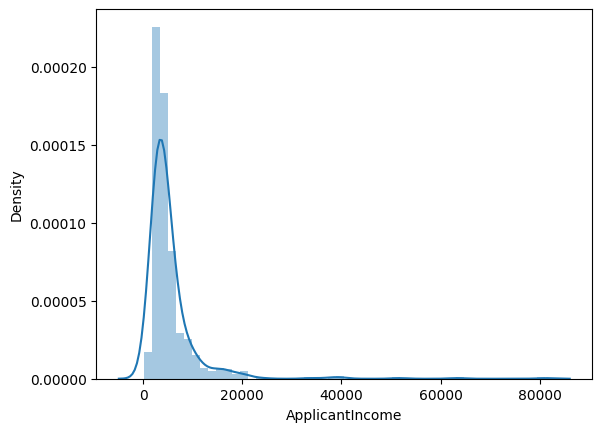

In [14]:
sns.distplot(df['ApplicantIncome'])
plt.show()

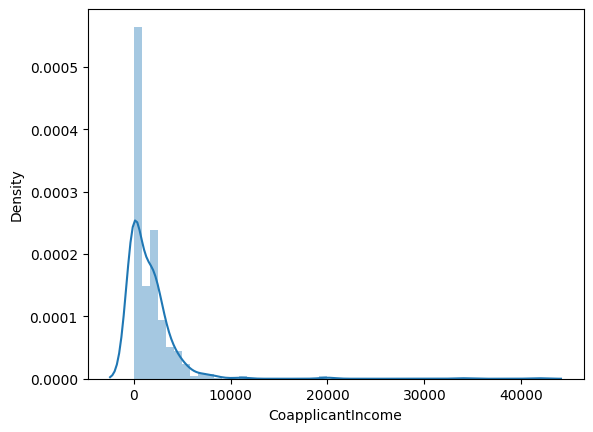

In [15]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

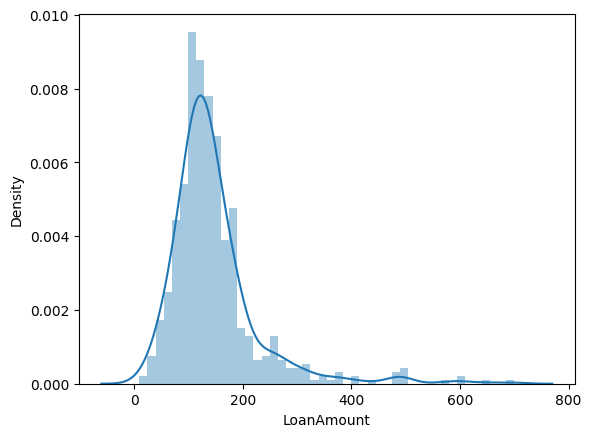

In [16]:
sns.distplot(df['LoanAmount'])
plt.show()

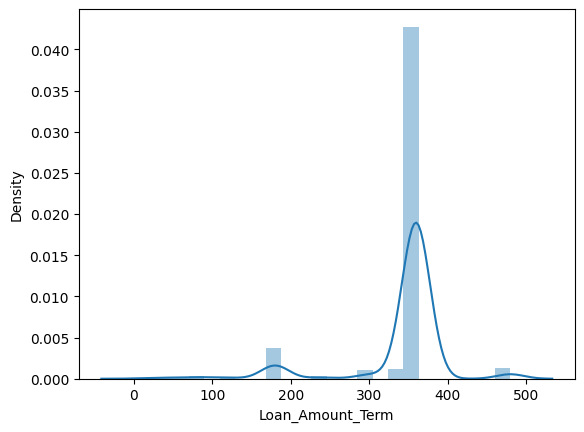

In [17]:
sns.distplot(df['Loan_Amount_Term'])
plt.show()

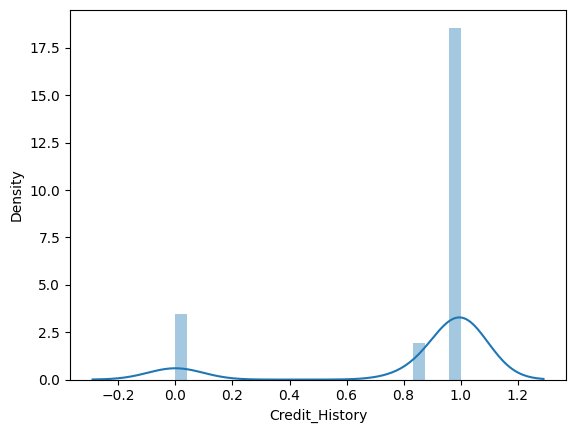

In [18]:
sns.distplot(df['Credit_History'])
plt.show()

In [19]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


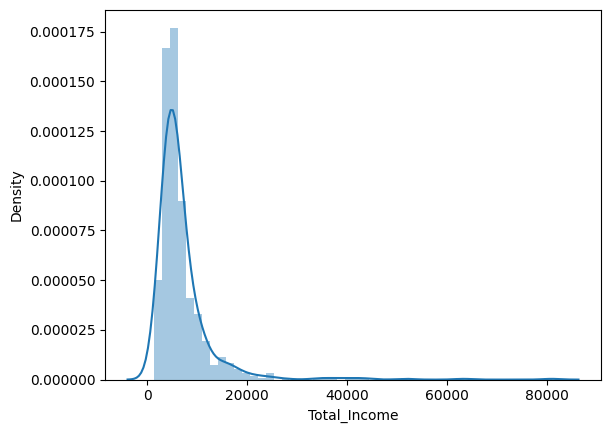

In [20]:
sns.distplot(df['Total_Income'])
plt.show()

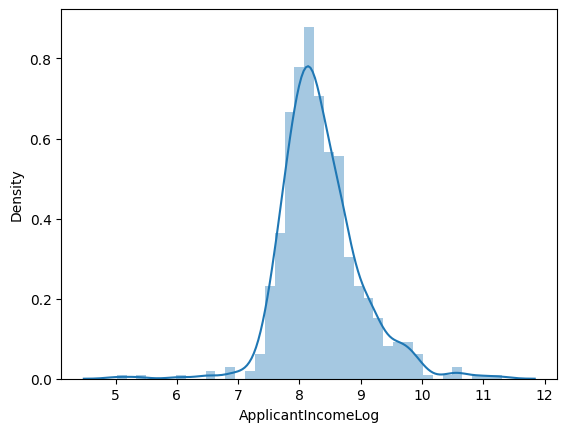

In [21]:
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomeLog'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

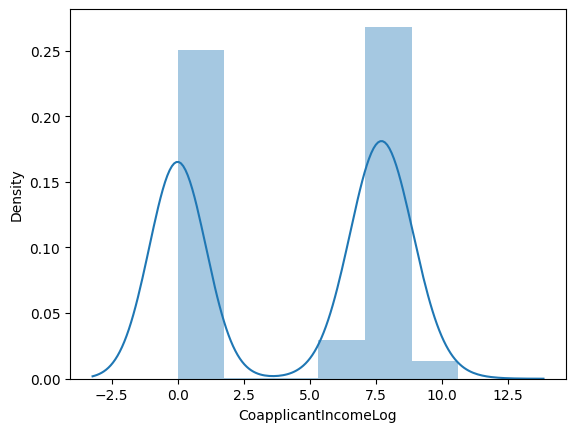

In [22]:
df['CoapplicantIncomeLog']=np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncomeLog'])
plt.show

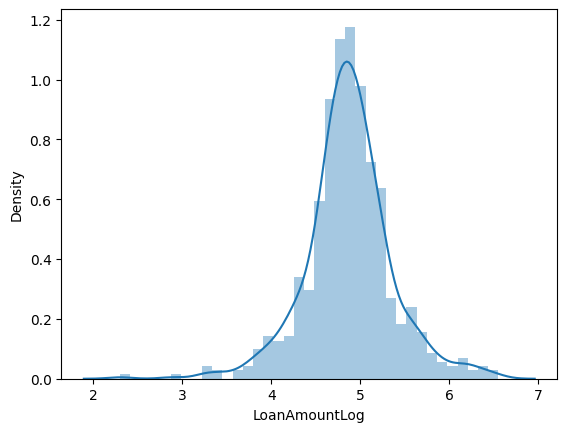

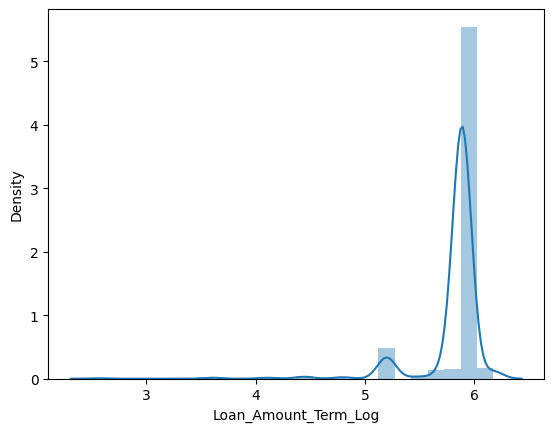

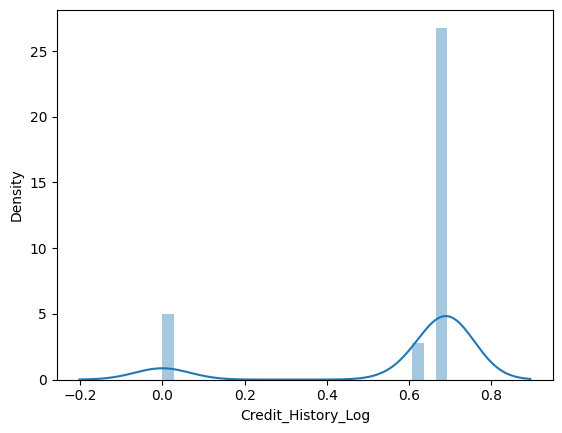

In [23]:
df['LoanAmountLog']=np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmountLog'])
plt.show()
df['Loan_Amount_Term_Log']=np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_Log'])
plt.show()
df['Credit_History_Log']=np.log(df['Credit_History']+1)
sns.distplot(df['Credit_History_Log'])
plt.show()

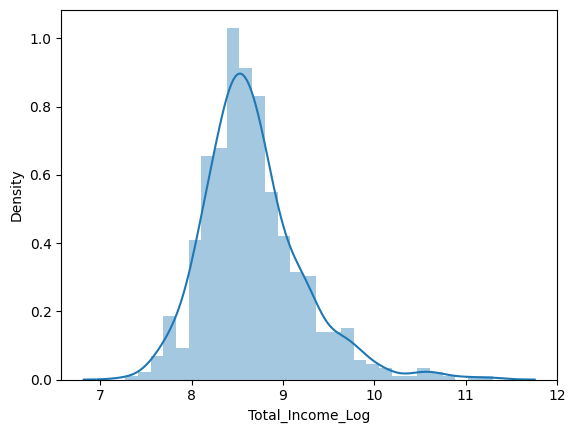

In [24]:
df['Total_Income_Log']=np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_Log'])
plt.show()

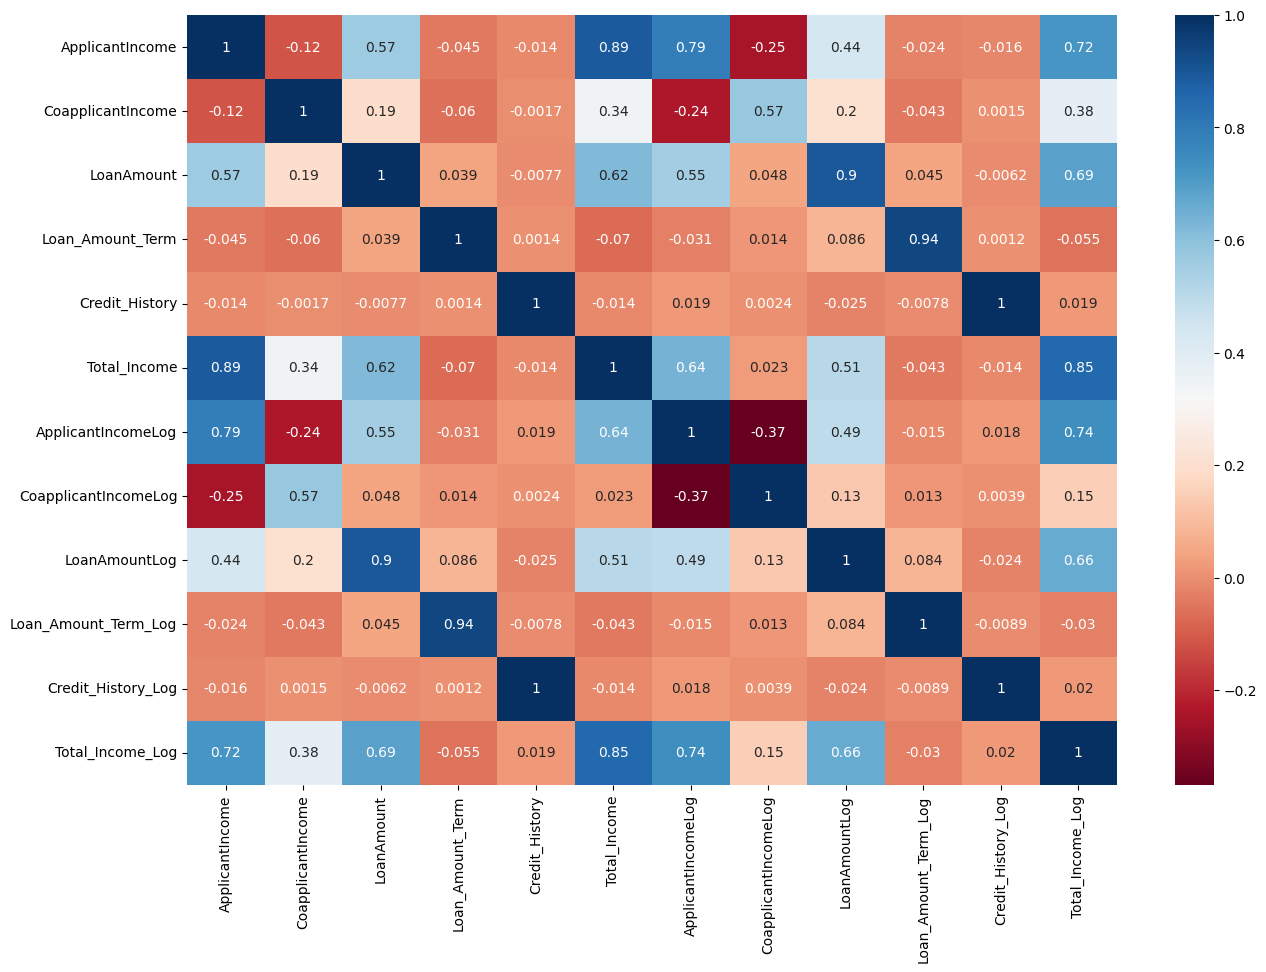

In [53]:
numeric_df=df.select_dtypes(include=['int64','float64'])
corr=numeric_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


In [56]:
cols=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Total_Income']
df=df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,Total_Income_Log
0,Male,No,0,Graduate,No,Urban,Y,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,Male,Yes,1,Graduate,No,Rural,N,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,Male,Yes,0,Graduate,Yes,Urban,Y,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,Male,Yes,0,Not Graduate,No,Urban,Y,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,Male,No,0,Graduate,No,Urban,Y,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


In [61]:
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,Total_Income_Log
0,1,0,0,0,0,2,1,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,1,1,1,0,0,0,0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,1,1,0,0,1,2,1,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,1,1,0,1,0,2,1,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,1,0,0,0,0,2,1,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


In [82]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
def classify(model,x,y):
    model.fit(x_train,y_train)
    print('Accuracy is:',model.score(x_test,y_test)*100 )
    score=cross_val_score(model,x,y,cv=5)
    print('Cross Validation is:',np.mean(score)*100)

In [84]:
model=LogisticRegression()
classify(model,X,y)

Accuracy is: 77.27272727272727
Cross Validation is: 80.9462881514061


In [87]:
model=DecisionTreeClassifier()
classify(model,X,y)

Accuracy is: 72.72727272727273
Cross Validation is: 73.29201652672265


from sklearn.ensemble import RandomForestClassifier,ExtraTressClassifier
model=RandomFprestClassifier()
classify(model,X,y)

In [89]:
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is: 75.97402597402598
Cross Validation is: 78.50726376116219


In [90]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is: 74.67532467532467
Cross Validation is: 76.22284419565506


In [92]:
model=RandomForestClassifier(n_estimators=100,min_samples_split=45,max_depth=7,max_features=1)
classify(model,X,y)

Accuracy is: 75.97402597402598
Cross Validation is: 78.83246701319473


In [98]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7662337662337663


In [100]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm


array([[23, 31],
       [ 5, 95]], dtype=int64)

<Axes: >

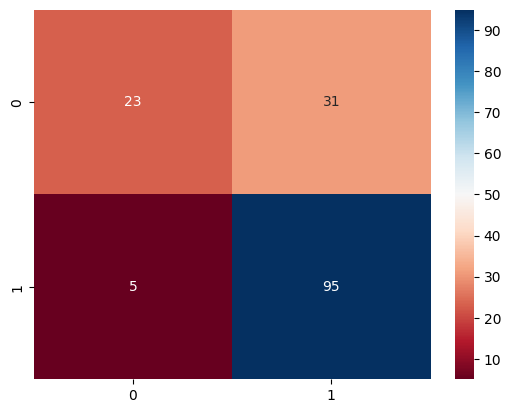

In [101]:
sns.heatmap(cm,annot=True,cmap='RdBu')